https://neokyo.com/en/kpop: 0.0379
https://techcrunch.com: 0.0377
https://inc42.com/buzz: 0.0375
https://myanimelist.net: 0.0375


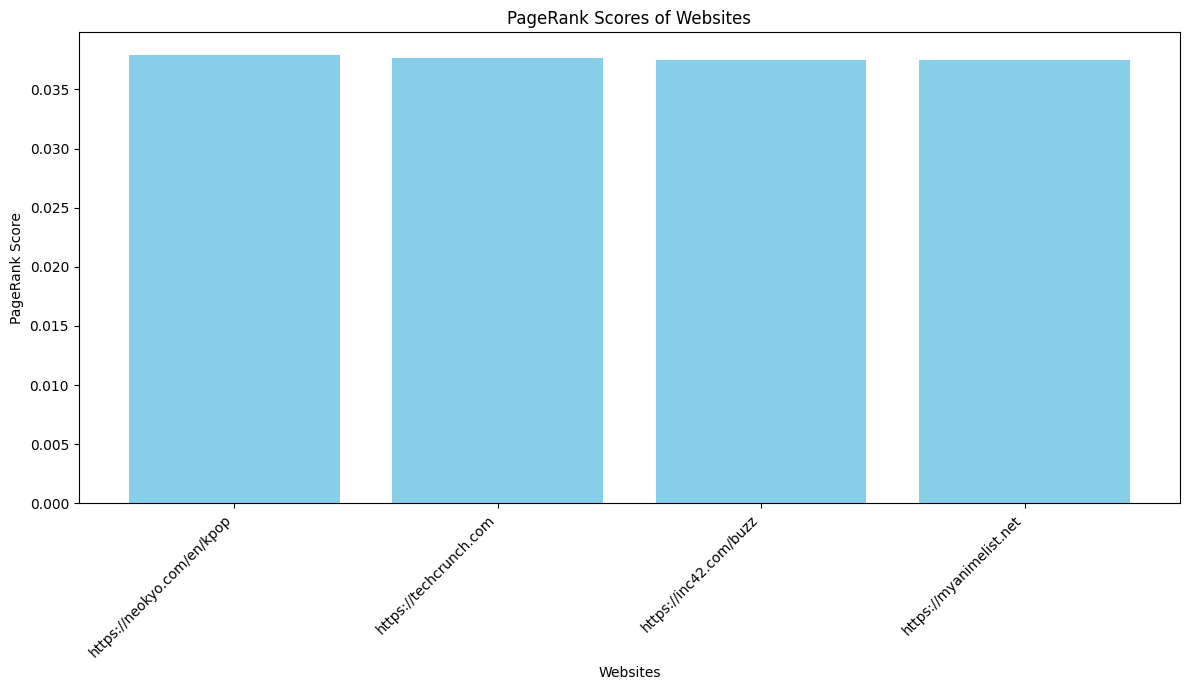

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to scrape links from a webpage
def scrape_links(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        return {a['href'] for a in soup.find_all('a', href=True)}
    except:
        return set()

# Websites and PageRank setup
websites = ['https://inc42.com/buzz', 'https://myanimelist.net', 'https://techcrunch.com', 'https://neokyo.com/en/kpop']
damping_factor = 0.85
pagerank = {url: 1.0 / len(websites) for url in websites}
num_iterations = 100

# Create link map
link_map = {url: scrape_links(url) for url in websites}

# PageRank calculation
for _ in range(num_iterations):
    pagerank = {url: (1 - damping_factor) / len(websites) +
                damping_factor * sum(pagerank[linking_url] / len(link_map[linking_url]) 
                for linking_url in websites if url in link_map[linking_url])
                for url in websites}

# Display PageRank values
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for url, rank in sorted_pagerank:
    print(f"{url}: {rank:.4f}")

# Plotting function
def plot_pagerank(pagerank):
    urls, ranks = zip(*sorted(pagerank.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(12, 7))
    plt.bar(urls, ranks, color="skyblue")
    plt.xlabel('Websites')
    plt.ylabel('PageRank Score')
    plt.title('PageRank Scores of Websites')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot sorted PageRank scores
plot_pagerank(pagerank)
